In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [212]:
df = pd.read_csv('real_estate_data.csv', sep=';',decimal=',')
df['built_date'] = pd.Series([float(data) for data in df['built_date']])
df.sample(10)

,id,address,area,price,rooms,built_date,description
48,49,"ul. Krótka 71, Warszawa",80.5,NaN,5.0,1968.0,Przestronny apartament
34,35,"ul. Widokowa 43, Warszawa",82.1,900 PLN,5.0,NaN,Luksusowy apartament
18,19,"ul. Graniczna 9, Szczecin",43.7,280 PLN,NaN,2005.0,Nowe budownictwo
4,5,"ul. Sportowa 49, Bydgoszcz",54.6,400 PLN,3.0,1989.0,Blisko hali sportowej
49,50,"ul. Słowackiego 73, Wrocław",47.6,295 PLN,2.0,1986.0,Blisko centrum
37,38,"ul. Sportowa 49, Bydgoszcz",54.6,360 PLN,3.0,1989.0,Blisko hali sportowej
30,31,"ul. Zielona 35, Szczecin",78.3,670 PLN,4.0,1971.0,Blisko lasu
45,46,"ul. Szeroka 65, Poznań",65.7,530 PLN,4.0,1977.0,Blisko komunikacji miejskiej
36,37,"ul. Cicha 47, Wrocław",NaN,170 PLN,1.0,2022.0,Niskie koszty utrzymania
19,20,"ul. Piastowska 11, Kraków",58.6,NaN,3.0,1992.0,Blisko uczelni


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           50 non-null     int64  
 1   address      50 non-null     object 
 2   area         46 non-null     object 
 3   price        47 non-null     object 
 4   rooms        47 non-null     float64
 5   built_date   48 non-null     float64
 6   description  50 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 2.9+ KB


In [214]:
df = df.sort_values('id')
df.drop_duplicates(subset='address',keep='last',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 49
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           48 non-null     int64  
 1   address      48 non-null     object 
 2   area         44 non-null     object 
 3   price        45 non-null     object 
 4   rooms        45 non-null     float64
 5   built_date   46 non-null     float64
 6   description  48 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 3.0+ KB


In [215]:
def parse_area(val):
    if pd.isna(val) or val == '':
        return np.nan
    try:
        val = float(str(val).replace(',','.'))
        if val<0:
            return np.nan
        return val
    except ValueError:
        return np.nan

df['area'] = df['area'].apply(parse_area)

In [216]:
def parse_price(val):
    if pd.isna(val):
        return np.nan

    text_val = str(val).lower()
    text_val = text_val.replace(',', '.')
    text_val = re.sub(r'[^0-9.]', '', text_val)

    if text_val == '':
        return np.nan

    try:
        return float(text_val)
    except ValueError:
        return np.nan

df['price'] = df['price'].apply(parse_price)


In [217]:
def parse_rooms(val):
    if pd.isna(val) or val == '':
        return np.nan
    try:
        r = int(val)
        if r<0:
            return np.nan
        return r
    except ValueError:
        return np.nan

df['rooms'] = df['rooms'].apply(parse_rooms)

In [218]:
def parse_built_date(val):
    if pd.isna(val) or val == '':
        return np.nan
    try:
        year = int(val)
        if not(1900 <= year <= 2025):
            return np.nan
        return year
    except ValueError:
        return np.nan

df['built_date'] = df['built_date'].apply(parse_built_date)

In [219]:
df = df.dropna()
df

,id,address,area,price,rooms,built_date,description
0,1,"ul. Zamkowa 10, Kraków",50.5,350.0,2.0,1995.0,"ładne mieszkanie, niedaleko Wawelu."
1,2,"ul. Piotrkowska 115, Łódź",60.0,420.0,3.0,1980.0,"Blisko centrum, stan dobry."
3,4,"ul. Leśna 20, Gdańsk",999.0,5000.0,5.0,1985.0,"!!! Oferta prywatna, do negocjacji !!!"
5,6,"ul. Grunwaldzka 15, Poznań",55.3,450.0,3.0,1980.0,"Po remoncie kuchni, woda ciepła miejska"
6,7,"ul. Akacjowa 12, Gdynia",47.5,230.0,2.0,1985.0,"Z dala od zgiełku, obok lasu"
7,8,"ul. Polna 18, Opole",35.0,150.0,1.0,2020.0,Adres niekompletny
8,9,"ul. Boczna 12, Lublin",55.0,435.0,3.0,1980.0,Dobra lokalizacja przy obwodnicy
9,10,"ul. Szkolna 4, Katowice",45.0,250.0,1.0,1960.0,W pobliżu szkoły i sklepów
15,16,"ul. Dębowa 6, Olsztyn",65.4,500.0,4.0,1980.0,Przestronne wnętrza
16,17,"ul. Wesoła 3, Bydgoszcz",50.8,345.0,2.0,1998.0,Blisko parku


In [220]:
df = df[df.price >= 100]
df

,id,address,area,price,rooms,built_date,description
0,1,"ul. Zamkowa 10, Kraków",50.5,350.0,2.0,1995.0,"ładne mieszkanie, niedaleko Wawelu."
1,2,"ul. Piotrkowska 115, Łódź",60.0,420.0,3.0,1980.0,"Blisko centrum, stan dobry."
3,4,"ul. Leśna 20, Gdańsk",999.0,5000.0,5.0,1985.0,"!!! Oferta prywatna, do negocjacji !!!"
5,6,"ul. Grunwaldzka 15, Poznań",55.3,450.0,3.0,1980.0,"Po remoncie kuchni, woda ciepła miejska"
6,7,"ul. Akacjowa 12, Gdynia",47.5,230.0,2.0,1985.0,"Z dala od zgiełku, obok lasu"
7,8,"ul. Polna 18, Opole",35.0,150.0,1.0,2020.0,Adres niekompletny
8,9,"ul. Boczna 12, Lublin",55.0,435.0,3.0,1980.0,Dobra lokalizacja przy obwodnicy
9,10,"ul. Szkolna 4, Katowice",45.0,250.0,1.0,1960.0,W pobliżu szkoły i sklepów
15,16,"ul. Dębowa 6, Olsztyn",65.4,500.0,4.0,1980.0,Przestronne wnętrza
16,17,"ul. Wesoła 3, Bydgoszcz",50.8,345.0,2.0,1998.0,Blisko parku


In [221]:
largest_area = df.loc[df['area'].idxmax()]
smallest_area = df.loc[df['area'].idxmin()]

print("Wiersz z największą wartością w 'area':")
print(largest_area)

print("\nWiersz z najmniejszą wartością w 'area':")
print(smallest_area)


Wiersz z największą wartością w 'area':
id                                                  4
address                          ul. Leśna 20, Gdańsk
area                                            999.0
price                                          5000.0
rooms                                             5.0
built_date                                     1985.0
description    !!! Oferta prywatna, do negocjacji !!!
Name: 3, dtype: object

Wiersz z najmniejszą wartością w 'area':
id                                     21
address        ul. Kościuszki 14, Rzeszów
area                                 33.3
price                               160.0
rooms                                 1.0
built_date                         2021.0
description           Kawalerka w centrum
Name: 20, dtype: object


In [223]:
largest_area = df.loc[df['area'].idxmax()]
smallest_area = df.loc[df['area'].idxmin()]

print("Wiersz z największą wartością w 'area':")
print(largest_area)

print("\nWiersz z najmniejszą wartością w 'area':")
print(smallest_area)

Wiersz z największą wartością w 'area':
id                                                  4
address                          ul. Leśna 20, Gdańsk
area                                            999.0
price                                          5000.0
rooms                                             5.0
built_date                                     1985.0
description    !!! Oferta prywatna, do negocjacji !!!
Name: 3, dtype: object

Wiersz z najmniejszą wartością w 'area':
id                                     21
address        ul. Kościuszki 14, Rzeszów
area                                 33.3
price                               160.0
rooms                                 1.0
built_date                         2021.0
description           Kawalerka w centrum
Name: 20, dtype: object


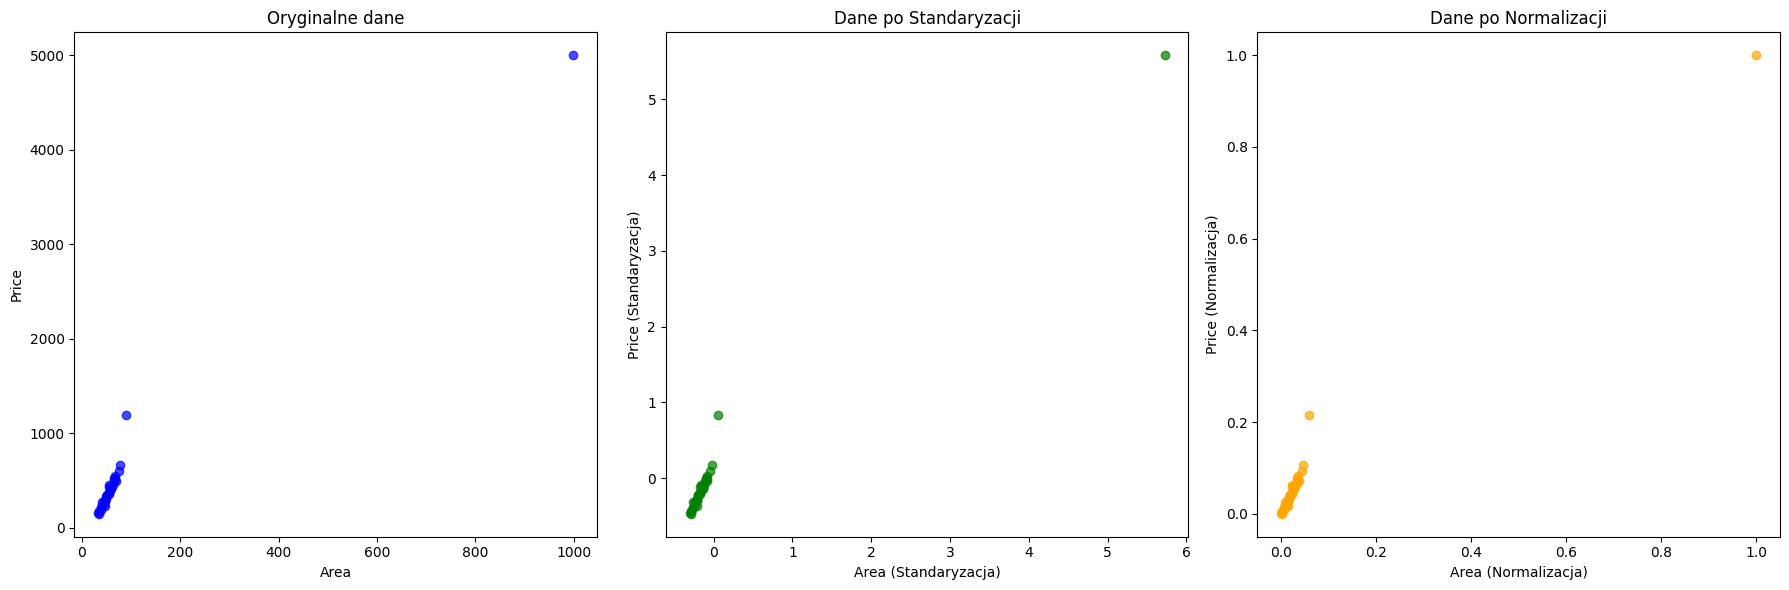

In [224]:
scaler_Standard = StandardScaler()
standardized_data = scaler_Standard.fit_transform(df[['area','price']])

scaler_MinMax = MinMaxScaler()
normalized_data = scaler_MinMax.fit_transform(df[['area','price']])

# Wykresy punktowe
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Oryginalne dane
axes[0].scatter(df['area'], df['price'], color='blue', alpha=0.7)
axes[0].set_title('Oryginalne dane')
axes[0].set_xlabel('Area')
axes[0].set_ylabel('Price')

# Dane po standaryzacji
axes[1].scatter(standardized_data[:, 0], standardized_data[:, 1], color='green', alpha=0.7)
axes[1].set_title('Dane po Standaryzacji')
axes[1].set_xlabel('Area (Standaryzacja)')
axes[1].set_ylabel('Price (Standaryzacja)')

# Dane po normalizacji
axes[2].scatter(normalized_data[:, 0], normalized_data[:, 1], color='orange', alpha=0.7)
axes[2].set_title('Dane po Normalizacji')
axes[2].set_xlabel('Area (Normalizacja)')
axes[2].set_ylabel('Price (Normalizacja)')

plt.tight_layout()
plt.show()


In [227]:
df['total_price'] = df['area']*df['price']
df['city'] = df['address'].apply(lambda x: x.split()[-1].strip() if isinstance(x, str) else None)
df.drop(columns=['address','description'],inplace=True)
df

,id,area,price,rooms,built_date,total_price,city
0,1,50.5,350.0,2.0,1995.0,17675.0,Kraków
1,2,60.0,420.0,3.0,1980.0,25200.0,Łódź
3,4,999.0,5000.0,5.0,1985.0,4995000.0,Gdańsk
5,6,55.3,450.0,3.0,1980.0,24885.0,Poznań
6,7,47.5,230.0,2.0,1985.0,10925.0,Gdynia
7,8,35.0,150.0,1.0,2020.0,5250.0,Opole
8,9,55.0,435.0,3.0,1980.0,23925.0,Lublin
9,10,45.0,250.0,1.0,1960.0,11250.0,Katowice
15,16,65.4,500.0,4.0,1980.0,32700.0,Olsztyn
16,17,50.8,345.0,2.0,1998.0,17526.0,Bydgoszcz


In [ ]:
scaler = MinMaxScaler()
df['total_price'] = scaler.fit_transform(df['total_price'].to_numpy().reshape(-1,1))
df

ValueError: Expected 2D array, got 1D array instead:
array=[  17675.   25200. 4995000.   24885.   10925.    5250.   23925.   11250.
   32700.   17526.   45000.    5328.  108000.   28125.   12155.   20900.
    8690.   15097.   37290.    6336.   25542.   52461.   13688.   24600.
   34500.   19656.    9637.   35568.   17034.    7315.   34821.   11043.
   20700.   14042.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.